   GrLivArea   LotArea  YearBuilt  HouseStyle_1.5Fin  HouseStyle_1.5Unf  \
0   0.370333 -0.207142   1.050994                  0                  0   
1  -0.482512 -0.091886   0.156734                  0                  0   
2   0.515013  0.073480   0.984752                  0                  0   
3   0.383659 -0.096897  -1.863632                  0                  0   
4   1.299326  0.375148   0.951632                  0                  0   

   HouseStyle_1Story  HouseStyle_2.5Fin  HouseStyle_2.5Unf  HouseStyle_2Story  \
0                  0                  0                  0                  1   
1                  1                  0                  0                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  1   
4                  0                  0                  0                  1   

   HouseStyle_SFoyer  HouseStyle_SLvl  
0                  0  

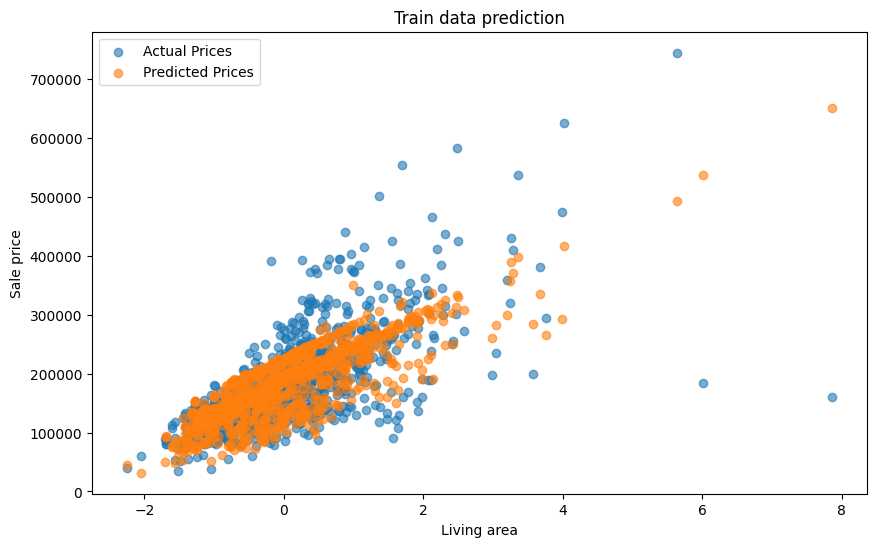

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load CSV containing housing prices into Pandas DataFrame
df = pd.read_csv("HousePrice.csv")

# Get basic information about features and response data
# print(df[["GrLivArea", "LotArea", "YearBuilt", "HouseStyle" , "SalePrice"]].info())        # display information about specific relevant columns
# print(df[["GrLivArea", "LotArea", "YearBuilt", "HouseStyle" , "SalePrice"]].head())        # display first 5 rows
# print(df[["GrLivArea", "LotArea", "YearBuilt", "HouseStyle" , "SalePrice"]].isna().sum())  # Check missing values, handle them (drop or impute) before training

numeric_cols = ["GrLivArea", "LotArea", "YearBuilt"]
categorical_cols = ["HouseStyle"]

# Convert categorical feature (HouseStyle) into one-hot encoded (dummy) numeric columns (0/1)
dummies_categorical_df = pd.get_dummies(df[categorical_cols], dtype=int)

# Scale numeric feature columns using StandardScaler (returns a NumPy array without column names)
scaler = StandardScaler()
scaled_numeric = scaler.fit_transform(df[numeric_cols]) # this returns NumPy array

# Convert scaled numeric data to a DataFrame and preserve column names and index
scaled_numeric_df = pd.DataFrame(
    scaled_numeric,
    columns=numeric_cols,
    index=df.index
)

# Extract features and response from DataFrame
X = pd.concat([scaled_numeric_df, dummies_categorical_df], axis=1)
y = df["SalePrice"]    

print(X.head())

# Split data into train (70%) and test (30%) sets, random_state makes the split reproducible
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train the linear regression model on the training dataset
linreg_model = LinearRegression()
linreg_model.fit(X_train, y_train)
print(X_train.head())
# Predict on train and test datasets
prediction_train = linreg_model.predict(X_train)
prediction_test = linreg_model.predict(X_test)

# Evaluate and display model accuracy with Mean Absolute Error for both train and test datasets
print(f"Mean absolute error in train dataset: {mean_absolute_error(y_train, prediction_train):.2f}")
print(f"Mean absolute error in test dataset: {mean_absolute_error(y_test, prediction_test):.2f}")

# Evaluate and display model accuracy with R2 Score for both train and test datasets
print(f"\nR2 score in train dataset: {r2_score(y_train, prediction_train):.2f}")
print(f"R2 score in test dataset: {r2_score(y_test, prediction_test):.2f}")

# Plot prediction vs actuals on train dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train.iloc[:, 0], y_train, label="Actual Prices", alpha=0.6)
plt.scatter(X_train.iloc[:, 0], prediction_train, label="Predicted Prices", alpha=0.6)
plt.title("Train data prediction")
plt.xlabel("Living area")
plt.ylabel("Sale price")
plt.legend(loc="upper left")
plt.show()

# # Plot prediction vs actuals on test dataset
# plt.figure(figsize=(10, 6))
# plt.scatter(X_test, y_test, label="Actual Prices", alpha=0.6)
# plt.scatter(X_test, prediction_test, label="Predicted Prices", alpha=0.6)
# plt.title("Test data prediction")
# plt.xlabel("Living area")
# plt.ylabel("Sale price")
# plt.legend(loc="upper left")
# plt.show()